In [1]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Bipartite graphs III / Graphs as matrices I

Parts of this notebooks are based on or inspired by [Eric Ma](https://ericmjl.github.io/)'s code from his amazing course:

https://campus.datacamp.com/courses/intermediate-network-analysis-in-python/

## Create bipartite graph

In [8]:
# Create nodes
customers = ['cust_' + f'{i:02d}' for i in range(200)]
prods = ['prod_' + f'{i:02d}' for i in range(40)]

# Generate random edges
edges = [(np.random.choice(customers), np.random.choice(prods)) for i in range(1100)]

In [9]:
# Initialize a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(customers, bipartite = 'customers')
G.add_nodes_from(prods, bipartite = 'prods')

# Add edges
G.add_edges_from(set(edges))

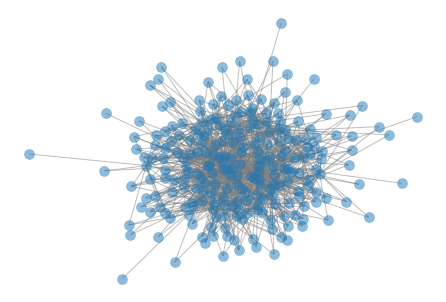

In [10]:
nx.draw(G, alpha = .5, node_size = 100, edge_color = 'gray')

## Compute `biadjacency_matrix` 

In [11]:
# First, we need to get a list of all nodes within each category
customers = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'customers']
prods = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'prods']

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, 
                                            row_order    = customers, 
                                            column_order = prods)

# Compute the user-user projection: user_matrix
customer_matrix = bi_matrix @ bi_matrix.T

In [12]:
customer_matrix

<200x200 sparse matrix of type '<class 'numpy.intc'>'
	with 20006 stored elements in Compressed Sparse Row format>

### Plot the customer adjacency  matrix

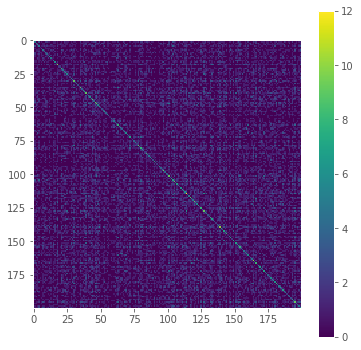

In [13]:
plt.figure(figsize = (6, 6))
plt.imshow(customer_matrix.todense())
plt.grid(None)
plt.colorbar()
plt.show()